**HOUSE PRICE PREDICTION**

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [416]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [417]:
# check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [418]:
# removing null values as the null value count is very minimal(~200) compared to size of dataset
data.dropna(inplace = True)

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [420]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [421]:
y = data['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [422]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [423]:
training_data = x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13651,-117.31,34.05,6.0,7423.0,2111.0,4092.0,1789.0,2.7002,INLAND,88300.0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,<1H OCEAN,241900.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,97800.0
9370,-122.52,37.92,24.0,421.0,64.0,163.0,75.0,14.5833,NEAR BAY,500001.0
8804,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
17926,-121.99,37.34,26.0,3637.0,933.0,2249.0,905.0,3.9625,<1H OCEAN,262900.0
4898,-118.24,34.01,30.0,405.0,86.0,376.0,68.0,1.7813,<1H OCEAN,127500.0
8835,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,<1H OCEAN,400000.0
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,<1H OCEAN,148800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 1500x500 with 0 Axes>

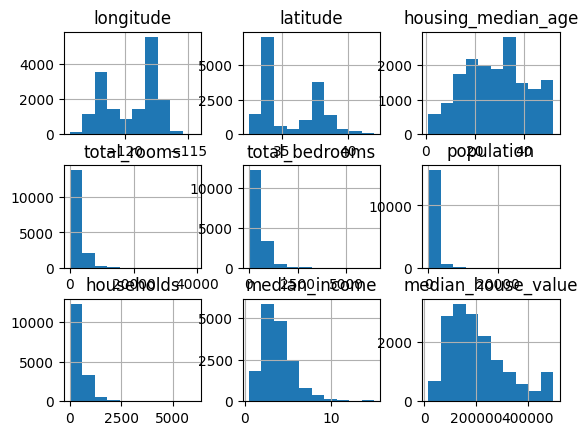

In [424]:
plt.figure(figsize = (15,5))
training_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

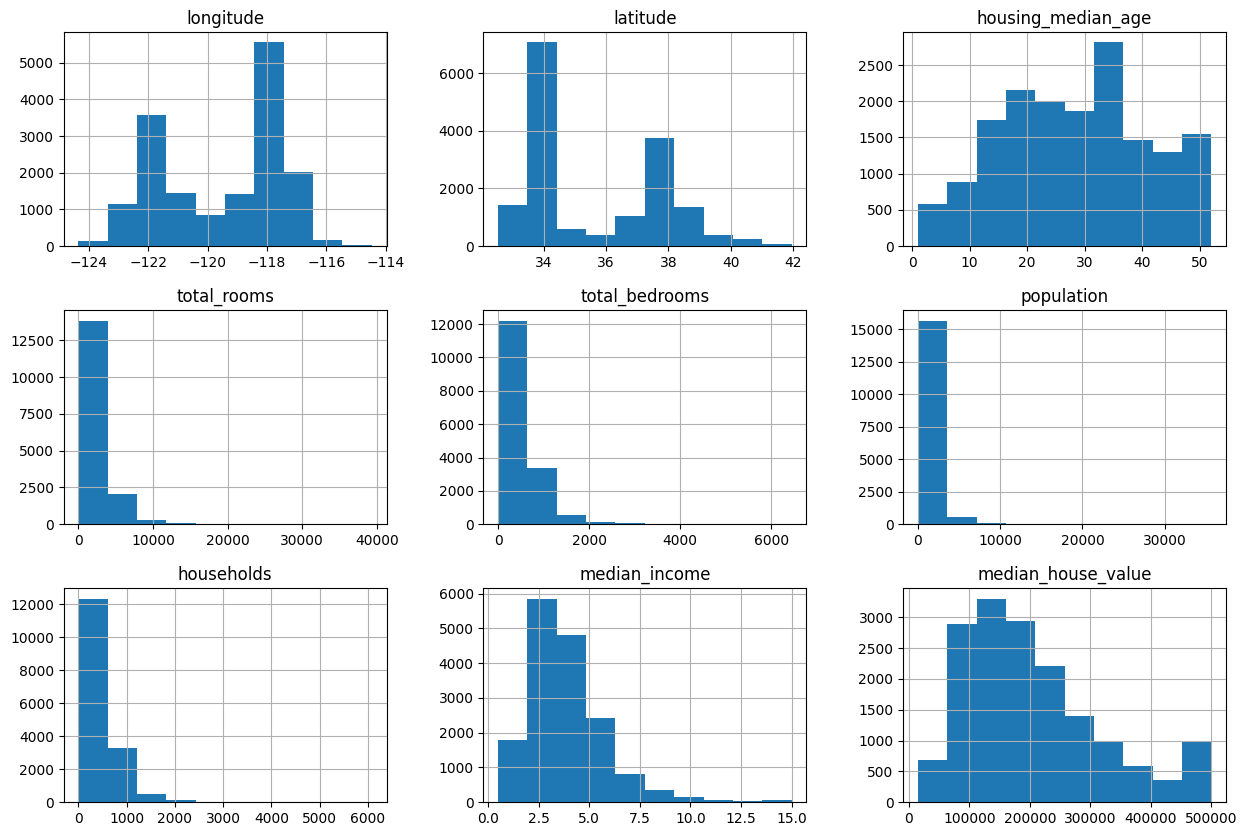

In [425]:
training_data.hist(figsize=(15,10))

In [426]:
new_training_data = training_data.drop(['ocean_proximity'], axis = 1)
new_training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13651,-117.31,34.05,6.0,7423.0,2111.0,4092.0,1789.0,2.7002,88300.0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0
9370,-122.52,37.92,24.0,421.0,64.0,163.0,75.0,14.5833,500001.0
8804,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,500001.0
...,...,...,...,...,...,...,...,...,...
17926,-121.99,37.34,26.0,3637.0,933.0,2249.0,905.0,3.9625,262900.0
4898,-118.24,34.01,30.0,405.0,86.0,376.0,68.0,1.7813,127500.0
8835,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,400000.0
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,148800.0


In [427]:
new_training_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924930,-0.112300,0.047094,0.071181,0.101521,0.058737,-0.017341,-0.047237
latitude,-0.924930,1.000000,0.015413,-0.037423,-0.067547,-0.109331,-0.073044,-0.076928,-0.142234
housing_median_age,-0.112300,0.015413,1.000000,-0.359754,-0.319850,-0.292253,-0.301752,-0.114855,0.104429
total_rooms,0.047094,-0.037423,-0.359754,1.000000,0.929481,0.854644,0.919181,0.201409,0.137166
total_bedrooms,0.071181,-0.067547,-0.319850,0.929481,1.000000,0.875929,0.980270,-0.006241,0.051997
population,0.101521,-0.109331,-0.292253,0.854644,0.875929,1.000000,0.904823,0.006187,-0.023476
households,0.058737,-0.073044,-0.301752,0.919181,0.980270,0.904823,1.000000,0.015617,0.067323
median_income,-0.017341,-0.076928,-0.114855,0.201409,-0.006241,0.006187,0.015617,1.000000,0.689665
median_house_value,-0.047237,-0.142234,0.104429,0.137166,0.051997,-0.023476,0.067323,0.689665,1.000000


<Axes: >

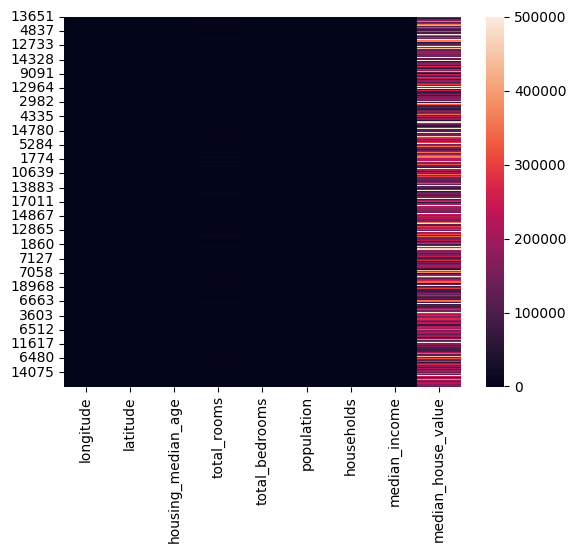

In [428]:
sns.heatmap(new_training_data)

<Axes: >

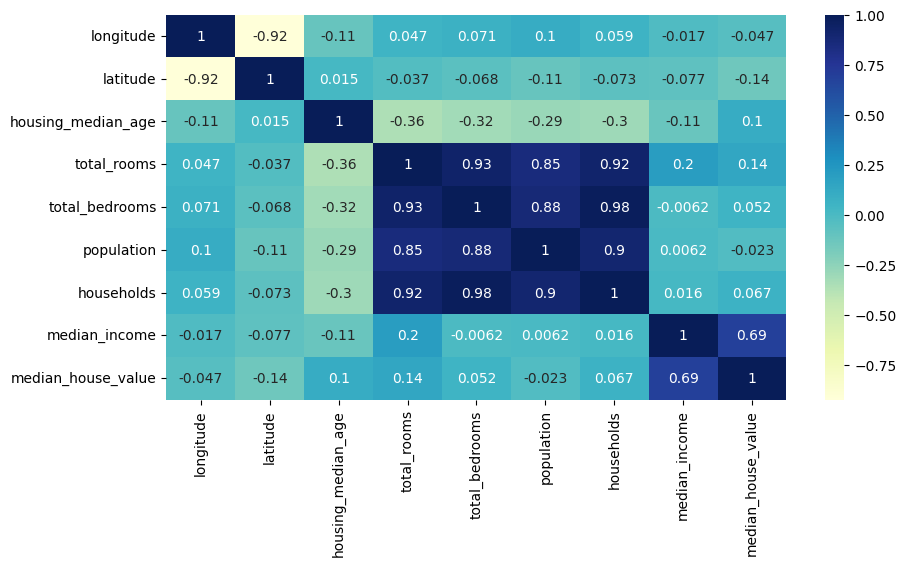

In [429]:
plt.figure(figsize = (10,5))
sns.heatmap(new_training_data.corr(), annot = True, cmap = 'YlGnBu')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

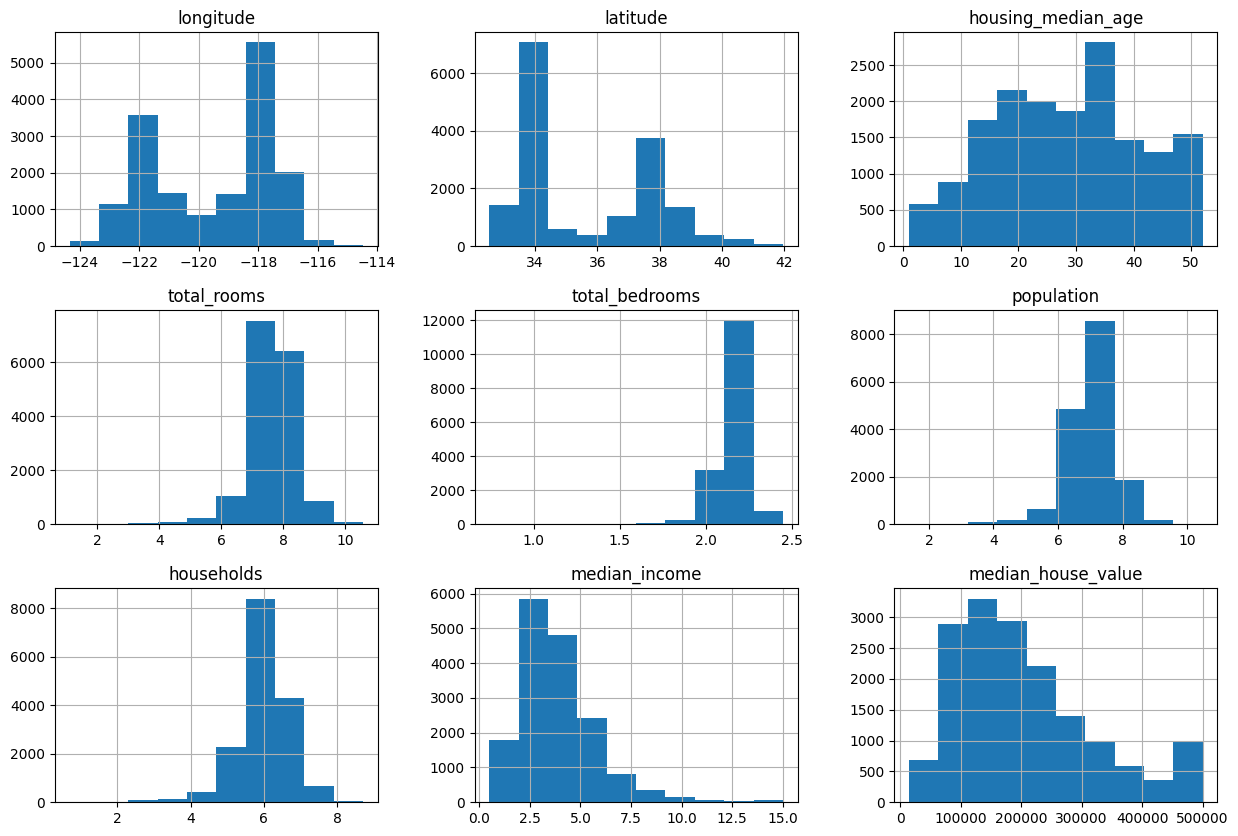

In [430]:
# pre-processing data to get a Gaussian Bell Curve plot in histogram
new_training_data['total_rooms'] = np.log(new_training_data['total_rooms'] + 1)
new_training_data['total_bedrooms'] = np.log(new_training_data['total_rooms'] + 1)
new_training_data['population'] = np.log(new_training_data['population'] + 1)
new_training_data['households'] = np.log(new_training_data['households'] + 1)

new_training_data.hist(figsize = (15,10))

In [431]:
training_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7206
INLAND        5205
NEAR OCEAN    2115
NEAR BAY      1817
ISLAND           3
Name: count, dtype: int64

In [432]:
# encoding the 'ocean_proximity' column
pd.get_dummies(training_data.ocean_proximity, dtype = int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13651,0,1,0,0,0
17728,1,0,0,0,0
13908,0,1,0,0,0
9370,0,0,0,1,0
8804,0,0,0,0,1
...,...,...,...,...,...
17926,1,0,0,0,0
4898,1,0,0,0,0
8835,1,0,0,0,0
7000,1,0,0,0,0


In [433]:
training_data = training_data.join(pd.get_dummies(training_data.ocean_proximity, dtype = int))
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13651,-117.31,34.05,6.0,7423.0,2111.0,4092.0,1789.0,2.7002,INLAND,88300.0,0,1,0,0,0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,<1H OCEAN,241900.0,1,0,0,0,0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,97800.0,0,1,0,0,0
9370,-122.52,37.92,24.0,421.0,64.0,163.0,75.0,14.5833,NEAR BAY,500001.0,0,0,0,1,0
8804,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,NEAR OCEAN,500001.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,-121.99,37.34,26.0,3637.0,933.0,2249.0,905.0,3.9625,<1H OCEAN,262900.0,1,0,0,0,0
4898,-118.24,34.01,30.0,405.0,86.0,376.0,68.0,1.7813,<1H OCEAN,127500.0,1,0,0,0,0
8835,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,<1H OCEAN,400000.0,1,0,0,0,0
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,<1H OCEAN,148800.0,1,0,0,0,0


In [434]:
# removing the 'ocean_proximity' column after encoding it to numerical values
training_data = training_data.drop(['ocean_proximity'], axis = 1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13651,-117.31,34.05,6.0,7423.0,2111.0,4092.0,1789.0,2.7002,88300.0,0,1,0,0,0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0,1,0,0,0,0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,0,1,0,0,0
9370,-122.52,37.92,24.0,421.0,64.0,163.0,75.0,14.5833,500001.0,0,0,0,1,0
8804,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,500001.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,-121.99,37.34,26.0,3637.0,933.0,2249.0,905.0,3.9625,262900.0,1,0,0,0,0
4898,-118.24,34.01,30.0,405.0,86.0,376.0,68.0,1.7813,127500.0,1,0,0,0,0
8835,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,400000.0,1,0,0,0,0
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,148800.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

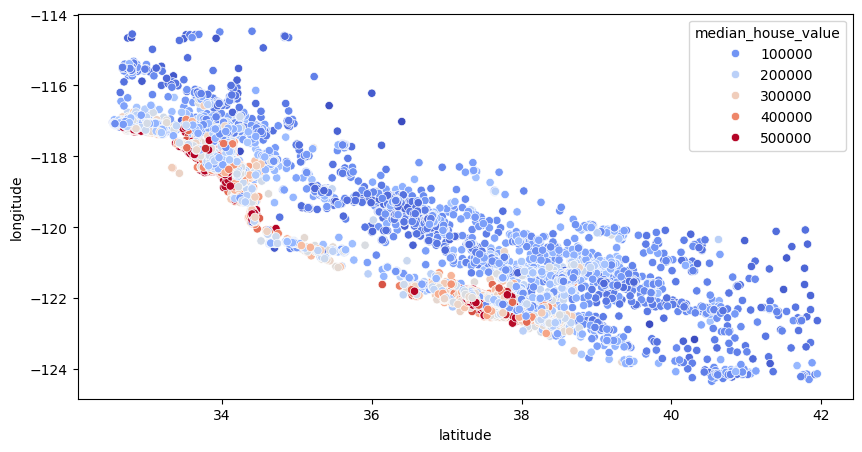

In [435]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'latitude', y = 'longitude', data = training_data, hue = 'median_house_value', palette = 'coolwarm')

In [436]:
training_data['bedroom_ratio'] = training_data['total_bedrooms']/training_data['total_rooms']
training_data['household_rooms'] = training_data['total_rooms']/training_data['households']
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13651,-117.31,34.05,6.0,7423.0,2111.0,4092.0,1789.0,2.7002,88300.0,0,1,0,0,0,0.284386,4.149245
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0,1,0,0,0,0,0.196842,4.905336
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,0,1,0,0,0,0.179609,6.346405
9370,-122.52,37.92,24.0,421.0,64.0,163.0,75.0,14.5833,500001.0,0,0,0,1,0,0.152019,5.613333
8804,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,500001.0,0,0,0,0,1,0.148030,7.058989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,-121.99,37.34,26.0,3637.0,933.0,2249.0,905.0,3.9625,262900.0,1,0,0,0,0,0.256530,4.018785
4898,-118.24,34.01,30.0,405.0,86.0,376.0,68.0,1.7813,127500.0,1,0,0,0,0,0.212346,5.955882
8835,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,400000.0,1,0,0,0,0,0.273016,4.285714
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,148800.0,1,0,0,0,0,0.236364,4.454829


<Axes: >

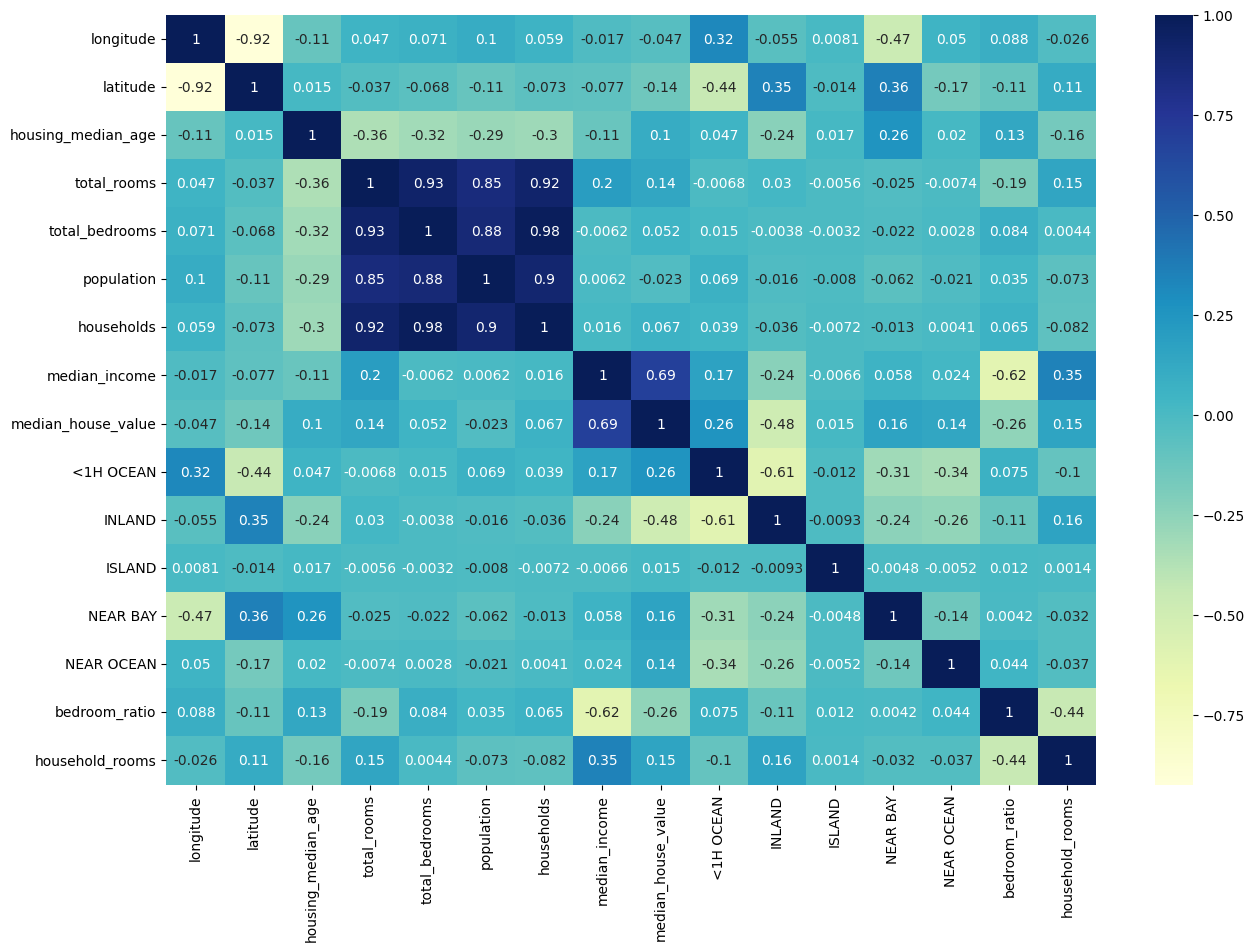

In [437]:
plt.figure(figsize = (15,10))
sns.heatmap(training_data.corr(), annot = True, cmap = 'YlGnBu')

In [438]:
# training(also called fitting) our data with linear regression model
x_train, y_train = training_data.drop(['median_house_value'], axis = 1), training_data['median_house_value']  # training the input data

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [439]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14514,-117.15,32.90,12.0,7.427739,2.131529,6.957497,5.894403,4.2008,<1H OCEAN,176100.0
14292,-117.13,32.74,50.0,7.331715,2.120069,6.591674,5.777652,2.6250,NEAR OCEAN,203200.0
722,-122.10,37.68,38.0,7.484369,2.138225,6.967909,5.993961,3.0962,NEAR BAY,180900.0
16640,-120.66,35.29,23.0,7.566828,2.147898,7.230563,6.159095,1.9647,NEAR OCEAN,253600.0
397,-122.29,37.88,50.0,7.100027,2.091867,6.261492,5.429346,3.8672,NEAR BAY,216700.0
...,...,...,...,...,...,...,...,...,...,...
3542,-118.57,34.27,20.0,8.907206,2.293262,7.935945,6.771936,9.6047,<1H OCEAN,500001.0
19523,-121.01,37.65,52.0,5.187386,1.822513,5.030438,4.143135,0.4999,INLAND,82500.0
5289,-118.48,34.05,36.0,7.670429,2.159918,6.622736,5.983936,6.7496,<1H OCEAN,500001.0
13309,-117.61,34.09,23.0,7.573531,2.148680,7.302496,5.950643,4.4205,INLAND,135500.0


In [440]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int))
test_data = test_data.drop(['ocean_proximity'], axis = 1)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14514,-117.15,32.90,12.0,7.427739,2.131529,6.957497,5.894403,4.2008,176100.0,1,0,0,0,0
14292,-117.13,32.74,50.0,7.331715,2.120069,6.591674,5.777652,2.6250,203200.0,0,0,0,0,1
722,-122.10,37.68,38.0,7.484369,2.138225,6.967909,5.993961,3.0962,180900.0,0,0,0,1,0
16640,-120.66,35.29,23.0,7.566828,2.147898,7.230563,6.159095,1.9647,253600.0,0,0,0,0,1
397,-122.29,37.88,50.0,7.100027,2.091867,6.261492,5.429346,3.8672,216700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,-118.57,34.27,20.0,8.907206,2.293262,7.935945,6.771936,9.6047,500001.0,1,0,0,0,0
19523,-121.01,37.65,52.0,5.187386,1.822513,5.030438,4.143135,0.4999,82500.0,0,1,0,0,0
5289,-118.48,34.05,36.0,7.670429,2.159918,6.622736,5.983936,6.7496,500001.0,1,0,0,0,0
13309,-117.61,34.09,23.0,7.573531,2.148680,7.302496,5.950643,4.4205,135500.0,0,1,0,0,0


In [441]:
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14514,-117.15,32.90,12.0,7.427739,2.131529,6.957497,5.894403,4.2008,176100.0,1,0,0,0,0,0.286969,1.260134
14292,-117.13,32.74,50.0,7.331715,2.120069,6.591674,5.777652,2.6250,203200.0,0,0,0,0,1,0.289164,1.268978
722,-122.10,37.68,38.0,7.484369,2.138225,6.967909,5.993961,3.0962,180900.0,0,0,0,1,0,0.285692,1.248651
16640,-120.66,35.29,23.0,7.566828,2.147898,7.230563,6.159095,1.9647,253600.0,0,0,0,0,1,0.283857,1.228562
397,-122.29,37.88,50.0,7.100027,2.091867,6.261492,5.429346,3.8672,216700.0,0,0,0,1,0,0.294628,1.307713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,-118.57,34.27,20.0,8.907206,2.293262,7.935945,6.771936,9.6047,500001.0,1,0,0,0,0,0.257461,1.315312
19523,-121.01,37.65,52.0,5.187386,1.822513,5.030438,4.143135,0.4999,82500.0,0,1,0,0,0,0.351335,1.252044
5289,-118.48,34.05,36.0,7.670429,2.159918,6.622736,5.983936,6.7496,500001.0,1,0,0,0,0,0.281590,1.281837
13309,-117.61,34.09,23.0,7.573531,2.148680,7.302496,5.950643,4.4205,135500.0,0,1,0,0,0,0.283709,1.272725


In [442]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [443]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14514,-117.15,32.90,12.0,7.427739,2.131529,6.957497,5.894403,4.2008,1,0,0,0,0,0.286969,1.260134
14292,-117.13,32.74,50.0,7.331715,2.120069,6.591674,5.777652,2.6250,0,0,0,0,1,0.289164,1.268978
722,-122.10,37.68,38.0,7.484369,2.138225,6.967909,5.993961,3.0962,0,0,0,1,0,0.285692,1.248651
16640,-120.66,35.29,23.0,7.566828,2.147898,7.230563,6.159095,1.9647,0,0,0,0,1,0.283857,1.228562
397,-122.29,37.88,50.0,7.100027,2.091867,6.261492,5.429346,3.8672,0,0,0,1,0,0.294628,1.307713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,-118.57,34.27,20.0,8.907206,2.293262,7.935945,6.771936,9.6047,1,0,0,0,0,0.257461,1.315312
19523,-121.01,37.65,52.0,5.187386,1.822513,5.030438,4.143135,0.4999,0,1,0,0,0,0.351335,1.252044
5289,-118.48,34.05,36.0,7.670429,2.159918,6.622736,5.983936,6.7496,1,0,0,0,0,0.281590,1.281837
13309,-117.61,34.09,23.0,7.573531,2.148680,7.302496,5.950643,4.4205,0,1,0,0,0,0.283709,1.272725


In [444]:
y_test

14514    176100.0
14292    203200.0
722      180900.0
16640    253600.0
397      216700.0
           ...   
3542     500001.0
19523     82500.0
5289     500001.0
13309    135500.0
1943     207600.0
Name: median_house_value, Length: 4087, dtype: float64

In [445]:
reg.score(x_test,y_test)

0.5929315661956346

In [446]:
# fitting(or training) our data with RandomForest model
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [448]:
forest.score(x_test, y_test)

0.5002084304708243